In [2]:
%load_ext autoreload
%autoreload 2


In [4]:
# from transformers import AutoTokenizer, AutoModel
import pandas as pd
# import torch
import umap
import src.data.utils as utils
from sklearn.cluster import DBSCAN
import numpy as np
import gzip
import os

In [3]:
# tokenizer = AutoTokenizer.from_pretrained("allegro/herbert-base-cased")
# model = AutoModel.from_pretrained("allegro/herbert-base-cased")

# CUDA = torch.cuda.is_available()
# print(CUDA)
# if CUDA:
#     model = model.to("cuda")
    

In [5]:
embeddings = utils.list_full_paths(os.path.join("datasets", "embeddings"))
embeddings = np.vstack(list(map(lambda x: pd.read_pickle(x), embeddings)))
embeddings


array([[ 0.05603509,  0.05233474, -0.06723042, ..., -0.9979631 ,
         0.1633923 ,  0.30220625],
       [-0.11820081, -0.14392734,  0.26543245, ..., -0.6628099 ,
        -0.21193375, -0.09634862],
       [-0.02154368,  0.24584684,  0.25020698, ..., -0.9746169 ,
         0.2167497 ,  0.0137645 ],
       ...,
       [-0.06632918,  0.01606391,  0.10310698, ..., -0.98274195,
        -0.35376143,  0.0391259 ],
       [-0.06548926, -0.17287649,  0.02048367, ..., -0.9986892 ,
         0.03025478,  0.12522787],
       [-0.15146312,  0.08845308, -0.14816089, ..., -0.99938965,
        -0.07775856,  0.29376438]], dtype=float32)

In [6]:
# umap_embeddings = umap.UMAP(n_neighbors=15, n_components=5, metric='cosine', low_memory=True).fit_transform(embeddings)
# umap_embeddings

with gzip.open(os.path.join("datasets", "umap_embeddings.pkl.gz"), 'rb') as f:
    umap_embeddings = np.load(f)

print(umap_embeddings)

[[ 0.47806865 -0.3568573   3.5965712   6.3846464   6.328705  ]
 [ 4.592628    2.8513565  -0.17271632  5.4540153   9.528436  ]
 [ 1.6186268  -0.15735593  1.7111248   7.3238077   7.0394063 ]
 ...
 [-1.2506384   1.2238005   2.7091982   9.207826    7.7205186 ]
 [ 0.23767152 -1.2329723   3.1609778   5.1888404   6.203576  ]
 [ 0.31259543 -1.0755907   3.3676803   5.2034626   6.2344837 ]]


In [ ]:
umap_embeddings

Error: Session cannot generate requests

In [9]:
cluster = DBSCAN(n_jobs=-1).fit(umap_embeddings)
cluster

DBSCAN(n_jobs=-1)

In [10]:
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_

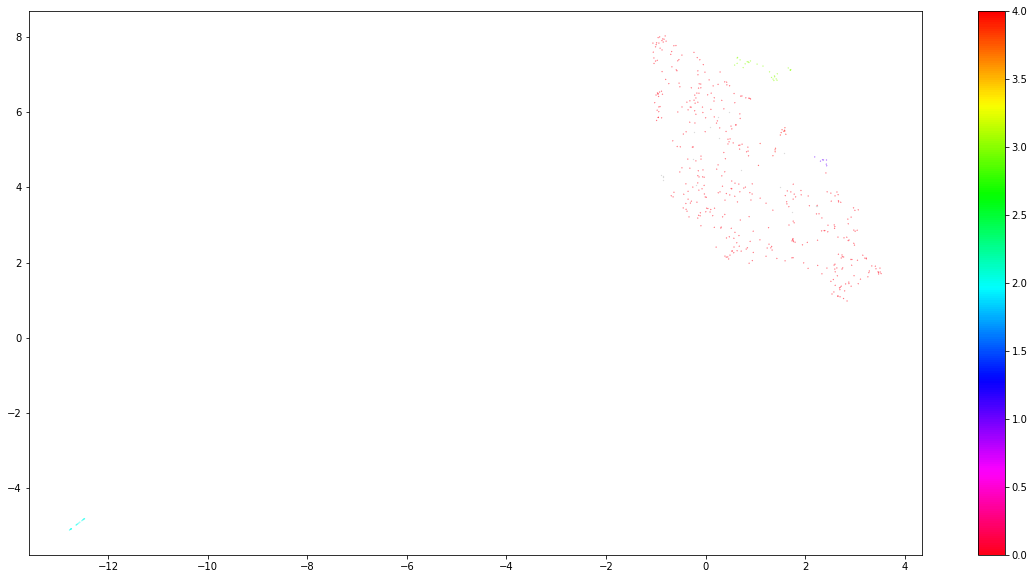

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()
plt.show()